In [ ]:
!pip install yfinance --upgrade --no-cache-dir

# 1. Extract


In [2]:
import yfinance as yf

santander = yf.Ticker("SANB11.SA")

# 2. Transform

In [3]:
# Pega ações no periodo de apenas um ano, exclui as colunas 'Dividends' e 'Stock Splits' e remove qualquer coluna vazia
df = santander.history(period="1y")
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df = df.dropna()
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-13 00:00:00-03:00,28.585271,28.773767,28.180007,28.406200,2237400
2022-10-14 00:00:00-03:00,28.604121,29.037659,28.283680,28.359077,2662800
2022-10-17 00:00:00-03:00,28.622973,28.933990,28.434477,28.613548,1584800
2022-10-18 00:00:00-03:00,28.924564,29.207306,28.717219,29.065935,2325900
2022-10-19 00:00:00-03:00,29.056508,29.245004,28.830315,29.018810,1747300
...,...,...,...,...,...
2023-10-06 00:00:00-03:00,26.540001,27.360001,26.510000,27.190001,3033400
2023-10-09 00:00:00-03:00,27.100000,27.430000,26.920000,27.430000,2521200
2023-10-10 00:00:00-03:00,27.500000,27.889999,27.340000,27.760000,2482500


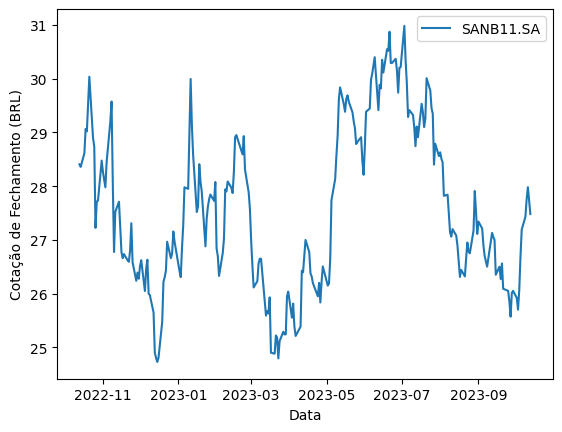

In [4]:
# Cria Gráfico da cotação de fechamento das ações do Santander
from matplotlib import pyplot as plt

%matplotlib inline
plt.plot(df['Close'], label= santander.info['symbol'])
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento ({0})'.format(santander.info['currency']))
plt.legend()
plt.show()

In [5]:
# Cria Gráfico Candlestick das ações do Santander
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])],
                      layout=go.Layout(
                              title=go.layout.Title(text="Gráfico Candlestick das ações do Santander (SANB11.SA)")
                      ))

fig.show()

# 3. Load

In [ ]:
pip install -U kaleido

In [7]:
# Salva Gráfico Candlestick em uma imagem .png
fig.write_image("santander_acoes_candlestick.png", engine="kaleido")